![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/colab/component_examples/classifiers/News_Classification.ipynb)


# [DistilBERT Sequence Classification Base - AG News](https://nlp.johnsnowlabs.com/2021/11/21/distilbert_base_sequence_classifier_ag_news_en.html)

DistilBERT Model with sequence classification/regression head on top (a linear layer on top of the pooled output) e.g. for multi-class document classification tasks.

`en.classify.distilbert_sequence.ag_news`  is a fine-tuned DistilBERT model that is ready to be used for Sequence Classification tasks such as sentiment analysis or multi-class text classification and it achieves state-of-the-art performance.


We used TFDistilBertForSequenceClassification to train this model and used BertForSequenceClassification annotator in Spark NLP 🚀 for prediction at scale!


It can be used to classify news into multiple categories that can be used by  news stations to provide  a better experience to their users. 
<br>

This model can be used to predict the following news categories 
`Business`, `Sci/Tech`, `Sports`, `World`

<br>




The data Source used to train this can be found [here](https://huggingface.co/datasets/ag_news)

<br>

##Benchmark on Dataset 
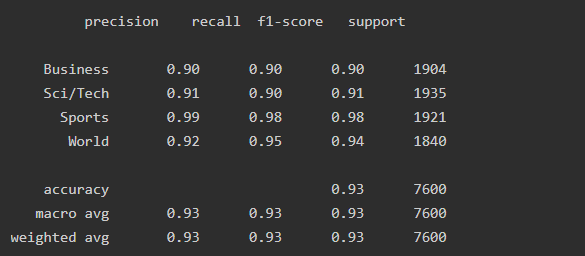

##1.Setup Java 8 and NLU

In [ ]:
!wget https://raw.githubusercontent.com/JohnSnowLabs/nlu/master/scripts/colab_setup.sh -O - | bash

import nlu

--2022-05-19 23:01:01--  https://raw.githubusercontent.com/JohnSnowLabs/nlu/master/scripts/colab_setup.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1665 (1.6K) [text/plain]
Saving to: ‘STDOUT’

-                     0%[                    ]       0  --.-KB/s               Installing  NLU 3.4.4rc1 with  PySpark 3.0.3 and Spark NLP 3.4.3 for Google Colab ...
-                   100%[===================>]   1.63K  --.-KB/s    in 0.001s  

2022-05-19 23:01:01 (1.66 MB/s) - written to stdout [1665/1665]

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 https://cloud.r-project.org/b

##2.Load the mdoel and make Sample Predictions 

In [ ]:
pipeline = nlu.load('en.classify.distilbert_sequence.ag_news')
pipeline.predict("The Stock Market just crashed as AAPL dropped by 2 %.")

distilbert_base_sequence_classifier_ag_news download started this may take some time.
Approximate size to download 234.9 MB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]


,classified_sequence,classified_sequence_confidence,sentence
0,Business,0.9741,The Stock Market just crashed as AAPL dropped ...


##3.Define Sample Sentences

In [ ]:
sample_sentences = [
"Global Warming is a major concern and action needs to be taken swiftly.",
"Disney Comics was a comic book publishing company operated by The Walt Disney Company which ran from 1990 to 1993.",
"Fans get ready as the next fifa game gets close to realsing.",
"Nasa makes great progress on it's mission of landing on mars"
]

##4.Predict on Sample Sentences

In [ ]:
pipeline.predict(sample_sentences)

,classified_sequence,classified_sequence_confidence,sentence
0,World,0.567128,Global Warming is a major concern and action n...
1,Business,0.899087,Disney Comics was a comic book publishing comp...
2,Sports,0.452134,Fans get ready as the next fifa game gets clos...
3,Sci/Tech,0.521322,Nasa makes great progress on it's mission of l...


##5.Take a look at the parmaters of the pipeline

In [ ]:
pipeline.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> component_list['distil_bert_for_sequence_classification'] has settable params:
component_list['distil_bert_for_sequence_classification'].setActivation('softmax')                         | Info: Whether to calcuate logits via Softmax or Sigmoid. Default is Softmax | Currently set to : softmax
component_list['distil_bert_for_sequence_classification'].setCoalesceSentences(False)                      | Info: Instead of 1 class per sentence (if inputCols is '''sentence''') output 1 class per document by averaging probabilities in all sentences. | Currently set to : False
component_list['distil_bert_for_sequence_classification'].setBatchSize(32)                                 | Info: Size of every batch | Currently set to : 32
component_list['distil_bert_for_sequence_classification'].setMaxSentenceLength(512)                        | Info: Max sentence length to process | Currently set to

Looking Good! Let's test this model on a labelled dataset to see how it performs 

##6.Download Data

we are going to test the model on [this](https://www.kaggle.com/datasets/rmisra/news-category-dataset?resource=download) dataset 

This dataset contains around 200k news headlines from the year 2012 to 2018 obtained from HuffPost. The model trained on this dataset could be used to identify tags for untracked news articles or to identify the type of language used in different news articles.

We filterd the dataset to include only the labels the model supports .


In [ ]:
!wget http://ckl-it.de/wp-content/uploads/2022/04/Data.csv

--2022-05-19 22:55:49--  http://ckl-it.de/wp-content/uploads/2022/04/Data.csv
Resolving ckl-it.de (ckl-it.de)... 217.160.0.108, 2001:8d8:100f:f000::209
Connecting to ckl-it.de (ckl-it.de)|217.160.0.108|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5551258 (5.3M) [text/csv]
Saving to: ‘Data.csv’

Data.csv            100%[===================>]   5.29M  2.40MB/s    in 2.2s    

2022-05-19 22:55:52 (2.40 MB/s) - ‘Data.csv’ saved [5551258/5551258]



In [ ]:
import pandas  as pd 
df = pd.read_csv("Data.csv")
df

,Unnamed: 0,category,headline,authors,link,short_description,date
0,11,World,South Korean President Meets North Korea's Kim...,NaN,https://www.huffingtonpost.com/entry/south-kor...,The two met to pave the way for a summit betwe...,2018-05-26
1,23,World,North Korea Still Open To Talks After Trump Ca...,"Josh Smith and Christine Kim, Reuters",https://www.huffingtonpost.com/entry/north-kor...,Trump’s announcement came after repeated threa...,2018-05-25
2,24,World,2 Men Detonate Bomb Inside Indian Restaurant N...,NaN,https://www.huffingtonpost.com/entry/mississau...,"Fifteen people were taken to the hospital, thr...",2018-05-25
3,25,World,Thousands Travel Home To Ireland To Vote On Ab...,Antonia Blumberg,https://www.huffingtonpost.com/entry/irish-tra...,Just try to read these #HomeToVote tweets with...,2018-05-25
4,26,World,Irish Voters Set To Liberalize Abortion Laws I...,NaN,https://www.huffingtonpost.com/entry/ireland-a...,Vote counting will begin Saturday.,2018-05-25
...,...,...,...,...,...,...,...
17253,200848,Sci/Tech,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,"Reuters, Reuters",https://www.huffingtonpost.com/entry/rim-ceo-t...,Verizon Wireless and AT&T are already promotin...,2012-01-28
17254,200849,Sports,Maria Sharapova Stunned By Victoria Azarenka I...,NaN,https://www.huffingtonpost.com/entry/maria-sha...,"Afterward, Azarenka, more effusive with the pr...",2012-01-28
17255,200850,Sports,"Giants Over Patriots, Jets Over Colts Among M...",NaN,https://www.huffingtonpost.com/entry/super-bow...,"Leading up to Super Bowl XLVI, the most talked...",2012-01-28
17256,200851,Sports,Aldon Smith Arrested: 49ers Linebacker Busted ...,NaN,https://www.huffingtonpost.com/entry/aldon-smi...,CORRECTION: An earlier version of this story i...,2012-01-28


In [ ]:
#The model makes prediction on the text column by default  
df['text'] = df['headline']+df['short_description']

Let's take  a Peek at the distribution of the labels 

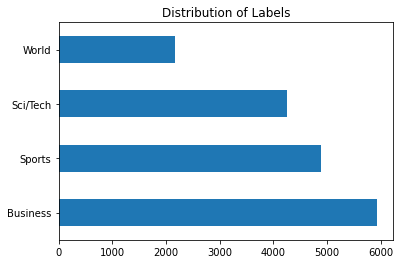

In [ ]:
df.category.value_counts().plot.barh(title='Distribution of Labels')

##7.Make Predictions with the model

In [ ]:
predctions = pipeline.predict(df,output_level = 'document')

In [ ]:
predctions = predctions.dropna(subset = ['classified_sequence'])

In [ ]:
predctions

,Unnamed: 0,authors,category,classified_sequence,classified_sequence_confidence,date,document,headline,link,short_description,text
0,11,None,World,[World],[0.99361455],2018-05-26,South Korean President Meets North Korea's Kim...,South Korean President Meets North Korea's Kim...,https://www.huffingtonpost.com/entry/south-kor...,The two met to pave the way for a summit betwe...,South Korean President Meets North Korea's Kim...
1,23,"Josh Smith and Christine Kim, Reuters",World,[World],[0.9782558],2018-05-25,North Korea Still Open To Talks After Trump Ca...,North Korea Still Open To Talks After Trump Ca...,https://www.huffingtonpost.com/entry/north-kor...,Trump’s announcement came after repeated threa...,North Korea Still Open To Talks After Trump Ca...
2,24,None,World,[World],[0.99901104],2018-05-25,2 Men Detonate Bomb Inside Indian Restaurant N...,2 Men Detonate Bomb Inside Indian Restaurant N...,https://www.huffingtonpost.com/entry/mississau...,"Fifteen people were taken to the hospital, thr...",2 Men Detonate Bomb Inside Indian Restaurant N...
3,25,Antonia Blumberg,World,[World],[0.60049206],2018-05-25,Thousands Travel Home To Ireland To Vote On Ab...,Thousands Travel Home To Ireland To Vote On Ab...,https://www.huffingtonpost.com/entry/irish-tra...,Just try to read these #HomeToVote tweets with...,Thousands Travel Home To Ireland To Vote On Ab...
4,26,None,World,[World],[0.99780566],2018-05-25,Irish Voters Set To Liberalize Abortion Laws I...,Irish Voters Set To Liberalize Abortion Laws I...,https://www.huffingtonpost.com/entry/ireland-a...,Vote counting will begin Saturday.,Irish Voters Set To Liberalize Abortion Laws I...
...,...,...,...,...,...,...,...,...,...,...,...
17253,200848,"Reuters, Reuters",Sci/Tech,[Sci/Tech],[0.8938764],2012-01-28,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,https://www.huffingtonpost.com/entry/rim-ceo-t...,Verizon Wireless and AT&T are already promotin...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...
17254,200849,None,Sports,[Sports],[0.9982187],2012-01-28,Maria Sharapova Stunned By Victoria Azarenka I...,Maria Sharapova Stunned By Victoria Azarenka I...,https://www.huffingtonpost.com/entry/maria-sha...,"Afterward, Azarenka, more effusive with the pr...",Maria Sharapova Stunned By Victoria Azarenka I...
17255,200850,None,Sports,[Sports],[0.98307234],2012-01-28,"Giants Over Patriots, Jets Over Colts Among Mo...","Giants Over Patriots, Jets Over Colts Among M...",https://www.huffingtonpost.com/entry/super-bow...,"Leading up to Super Bowl XLVI, the most talked...","Giants Over Patriots, Jets Over Colts Among M..."
17256,200851,None,Sports,[Sports],[0.9991338],2012-01-28,Aldon Smith Arrested: 49ers Linebacker Busted ...,Aldon Smith Arrested: 49ers Linebacker Busted ...,https://www.huffingtonpost.com/entry/aldon-smi...,CORRECTION: An earlier version of this story i...,Aldon Smith Arrested: 49ers Linebacker Busted ...


##8.Evaluate Predictions 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(predctions['category'], predctions['classified_sequence'].apply(lambda x: x[0])) )

              precision    recall  f1-score   support

    Business       0.88      0.59      0.71      5077
    Sci/Tech       0.63      0.90      0.74      3856
      Sports       0.95      0.69      0.80      4221
       World       0.56      0.86      0.68      2175

    accuracy                           0.73     15329
   macro avg       0.75      0.76      0.73     15329
weighted avg       0.79      0.73      0.73     15329



##9.Try a Differnet Model

In [ ]:
pipeline = nlu.load('en.classify.albert.ag_news')


albert_base_sequence_classifier_ag_news download started this may take some time.
Approximate size to download 42.8 MB
[OK!]


In [ ]:
predctions = pipeline.predict(df,output_level = 'document')

In [ ]:
predctions = predctions.dropna(subset = ['classified_sequence'])
Predctions


,Unnamed: 0,authors,category,classified_sequence,classified_sequence_confidence,date,document,headline,link,short_description,text
0,11,None,World,World,0.994577,2018-05-26,South Korean President Meets North Korea's Kim...,South Korean President Meets North Korea's Kim...,https://www.huffingtonpost.com/entry/south-kor...,The two met to pave the way for a summit betwe...,South Korean President Meets North Korea's Kim...
1,23,"Josh Smith and Christine Kim, Reuters",World,World,0.988318,2018-05-25,North Korea Still Open To Talks After Trump Ca...,North Korea Still Open To Talks After Trump Ca...,https://www.huffingtonpost.com/entry/north-kor...,Trump’s announcement came after repeated threa...,North Korea Still Open To Talks After Trump Ca...
2,24,None,World,World,0.99776,2018-05-25,2 Men Detonate Bomb Inside Indian Restaurant N...,2 Men Detonate Bomb Inside Indian Restaurant N...,https://www.huffingtonpost.com/entry/mississau...,"Fifteen people were taken to the hospital, thr...",2 Men Detonate Bomb Inside Indian Restaurant N...
3,25,Antonia Blumberg,World,World,0.942115,2018-05-25,Thousands Travel Home To Ireland To Vote On Ab...,Thousands Travel Home To Ireland To Vote On Ab...,https://www.huffingtonpost.com/entry/irish-tra...,Just try to read these #HomeToVote tweets with...,Thousands Travel Home To Ireland To Vote On Ab...
4,26,None,World,World,0.999283,2018-05-25,Irish Voters Set To Liberalize Abortion Laws I...,Irish Voters Set To Liberalize Abortion Laws I...,https://www.huffingtonpost.com/entry/ireland-a...,Vote counting will begin Saturday.,Irish Voters Set To Liberalize Abortion Laws I...
...,...,...,...,...,...,...,...,...,...,...,...
17253,200848,"Reuters, Reuters",Sci/Tech,Sci/Tech,0.969372,2012-01-28,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,https://www.huffingtonpost.com/entry/rim-ceo-t...,Verizon Wireless and AT&T are already promotin...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...
17254,200849,None,Sports,Sports,0.99914,2012-01-28,Maria Sharapova Stunned By Victoria Azarenka I...,Maria Sharapova Stunned By Victoria Azarenka I...,https://www.huffingtonpost.com/entry/maria-sha...,"Afterward, Azarenka, more effusive with the pr...",Maria Sharapova Stunned By Victoria Azarenka I...
17255,200850,None,Sports,Sports,0.998942,2012-01-28,"Giants Over Patriots, Jets Over Colts Among Mo...","Giants Over Patriots, Jets Over Colts Among M...",https://www.huffingtonpost.com/entry/super-bow...,"Leading up to Super Bowl XLVI, the most talked...","Giants Over Patriots, Jets Over Colts Among M..."
17256,200851,None,Sports,Sports,0.999581,2012-01-28,Aldon Smith Arrested: 49ers Linebacker Busted ...,Aldon Smith Arrested: 49ers Linebacker Busted ...,https://www.huffingtonpost.com/entry/aldon-smi...,CORRECTION: An earlier version of this story i...,Aldon Smith Arrested: 49ers Linebacker Busted ...


##10.Evaluate Predictions 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(predctions['category'], predctions['classified_sequence']) )

              precision    recall  f1-score   support

    Business       0.90      0.64      0.74      5077
    Sci/Tech       0.63      0.92      0.75      3856
      Sports       0.95      0.81      0.87      4221
       World       0.73      0.84      0.78      2175

    accuracy                           0.79     15329
   macro avg       0.80      0.80      0.79     15329
weighted avg       0.82      0.79      0.79     15329



# There are many more models you can put to use in 1 line of code!
## Checkout [the Modelshub](https://nlp.johnsnowlabs.com/models) and the [NLU Namespace](https://nlu.johnsnowlabs.com/docs/en/spellbook) for more models

### NLU Webinars and Video Tutorials
- [NLU & Streamlit Tutorial](https://vimeo.com/579508034#)
- [Crash course of the 50 + Medical Domains and the 200+ Healtchare models in NLU](https://www.youtube.com/watch?v=gGDsZXt1SF8)
- [Multi Lingual NLU Webinar - Tutorial on Chinese News dataset](https://www.youtube.com/watch?v=ftAOqJuxnV4)
- [John Snow Labs NLU: Become a Data Science Superhero with One Line of Python code](https://events.johnsnowlabs.com/john-snow-labs-nlu-become-a-data-science-superhero-with-one-line-of-python-code?hsCtaTracking=c659363c-2188-4c86-945f-5cfb7b42fcfc%7C8b2b188b-92a3-48ba-ad7e-073b384425b0)
- [Python Web Def Conf - Python's NLU library: 1,000+ Models, 200+ Languages, State of the Art Accuracy, 1 Line of Code](https://2021.pythonwebconf.com/presentations/john-snow-labs-nlu-the-simplicity-of-python-the-power-of-spark-nlp)
- [NYC/DC NLP Meetup with NLU](https://youtu.be/hJR9m3NYnwk?t=2155)

### More ressources 
- [Join our Slack](https://join.slack.com/t/spark-nlp/shared_invite/zt-lutct9gm-kuUazcyFKhuGY3_0AMkxqA)
- [NLU Website](https://nlu.johnsnowlabs.com/)
- [NLU Github](https://github.com/JohnSnowLabs/nlu)
- [Many more NLU example tutorials](https://github.com/JohnSnowLabs/nlu/tree/master/examples)
- [Overview of every powerful nlu 1-liner](https://nlu.johnsnowlabs.com/docs/en/examples)
- [Checkout the Modelshub for an overview of all models](https://nlp.johnsnowlabs.com/models) 
- [Checkout the NLU Namespace where you can find every model as a tabel](https://nlu.johnsnowlabs.com/docs/en/spellbook)
- [Intro to NLU article](https://medium.com/spark-nlp/1-line-of-code-350-nlp-models-with-john-snow-labs-nlu-in-python-2f1c55bba619)
- [Indepth and easy Sentence Similarity Tutorial, with StackOverflow Questions using BERTology embeddings](https://medium.com/spark-nlp/easy-sentence-similarity-with-bert-sentence-embeddings-using-john-snow-labs-nlu-ea078deb6ebf)
- [1 line of Python code for BERT, ALBERT, ELMO, ELECTRA, XLNET, GLOVE, Part of Speech with NLU and t-SNE](https://medium.com/spark-nlp/1-line-of-code-for-bert-albert-elmo-electra-xlnet-glove-part-of-speech-with-nlu-and-t-sne-9ebcd5379cd)